In [1]:
import json
import gc
import numpy as np

from utils.dataset import DetectionFolder
from utils.model import YoloV3, YoloLoss, PostProcessor

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from sklearn.cluster import KMeans

import urllib
from io import BytesIO
from PIL import Image
import os
import fnmatch

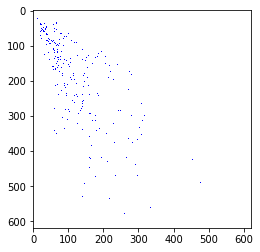

In [2]:
w = 620
h = 620

image = Image.new('RGB', (w, h), 'black')
pixels = image.load()


max_val = 0
all_labels = []
for file_name in os.listdir('../data/detect/labels/'):
    if fnmatch.fnmatch(file_name, '*.txt'):
        with open('../data/detect/labels/' + file_name, 'r') as labelfile:
            labellines = labelfile.readlines()
            labels = np.array([labelline.split(',') for labelline in labellines])
            labels = labels.astype(np.float)
            labels = [[label[3] - label[1], label[4] - label[2]] for label in labels]
            for label in labels:
                all_labels.append(label)
                pixels[int(label[0]), int(label[1])] = tuple([v + 1 for v in pixels[int(label[0]), int(label[1])]])
                max_val = max(max_val, pixels[int(label[0]), int(label[1])][0])

max_rate = 250 / max_val

for i in range(0, w):
    for j in range(0, h):
        if pixels[i, j][0] == 0:
            pixels[i, j] = tuple([255, 255, 255])
        else:
            pixels[i, j] = tuple([0 , 0, 255])
                      

plt.imshow(image)
plt.show()


In [3]:
print(len(all_labels))

1763


In [4]:
tmp = np.array(all_labels)
print(len(tmp))
print(tmp)




1763
[[234.9666 324.2666]
 [417.7186 340.3381]
 [106.0833 149.7481]
 ...
 [216.7763 355.6227]
 [150.7333 297.2941]
 [157.0666 333.0588]]


In [8]:
kmeans = KMeans(n_clusters=7).fit(all_labels)  

In [9]:
print(kmeans.cluster_centers_)

[[176.007651   151.416641  ]
 [137.08440148 279.08961778]
 [301.93423858 283.87957165]
 [ 51.96702287  79.17269663]
 [184.55711074 417.79325839]
 [366.19553553 464.60314079]
 [ 85.49125279 167.66314801]]


[[   176    151  53905]
 [   137    279  96683]
 [   301    283 171751]
 [    51     79   8968]
 [   184    417 208612]
 [   366    464 349955]
 [    85    167  35419]]


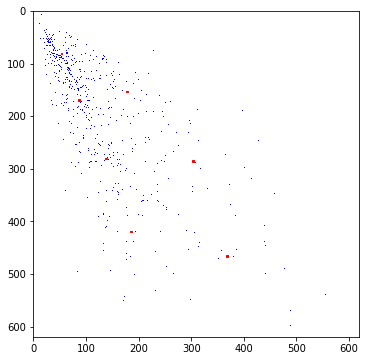

In [10]:
clusters = kmeans.cluster_centers_
clusters = np.array([[int(c[0]), int(c[1]), int(c[0] ** 2 + c[1] ** 2)] for c in clusters])
print(clusters)

_, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(image)
for center_it in range(0, len(clusters)):
    center = kmeans.cluster_centers_[center_it]
            
            
    bounding = patches.Rectangle((center[0], center[1]), 3, 3, 
                linewidth=1, edgecolor='red', facecolor='red')
    ax.add_patch(bounding)
plt.show()